In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_path = "drive/My Drive/"
!ls "drive/My Drive/"

room.jpg


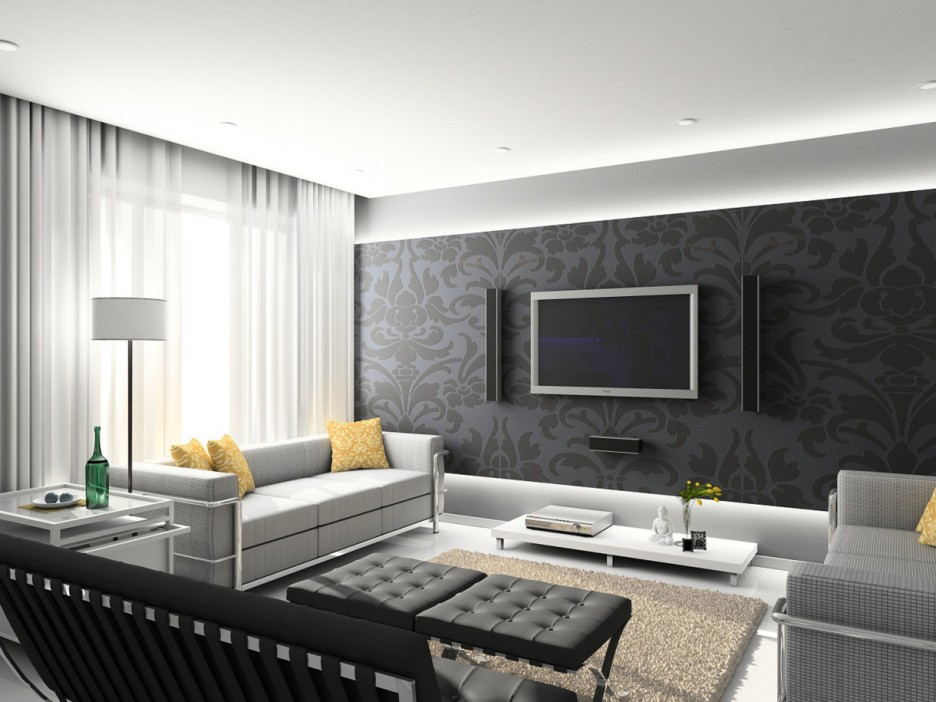

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


img1 = cv2.imread(data_path+'images/room.jpg')

print('room.jpg')
cv2_imshow(img1)
# cv2.imshow(img1)

In [3]:
def computeHomography(points1,points2):

    points1 = np.array(points1)
    points2 = np.array(points2)
    # print(points1,points2)
    points1 = np.column_stack((points1,np.ones(points1.shape[0]))).T
    points2 = np.column_stack((points2,np.ones(points2.shape[0]))).T

    p1 = points1[:-1,:].T
    p2 = points2[:-1,:].T


    A_up = np.column_stack((p1,np.ones(p1.shape[0]),np.zeros((p1.shape[0],3)),-p1[:,0]*p2[:,0],-p1[:,1]*p2[:,0],-p2[:,0]))
    A_below = np.column_stack((np.zeros((p1.shape[0],3)),p1,np.ones(p1.shape[0]),-p1[:,0]*p2[:,1],-p1[:,1]*p2[:,1],-p2[:,1]))

    A = np.vstack((A_up,A_below))

    result = np.linalg.svd(A)[-1][-1]
    result = result/result[-1]
    result = result.reshape((p1.shape[1]+1,-1))
    return result



warpPerspective


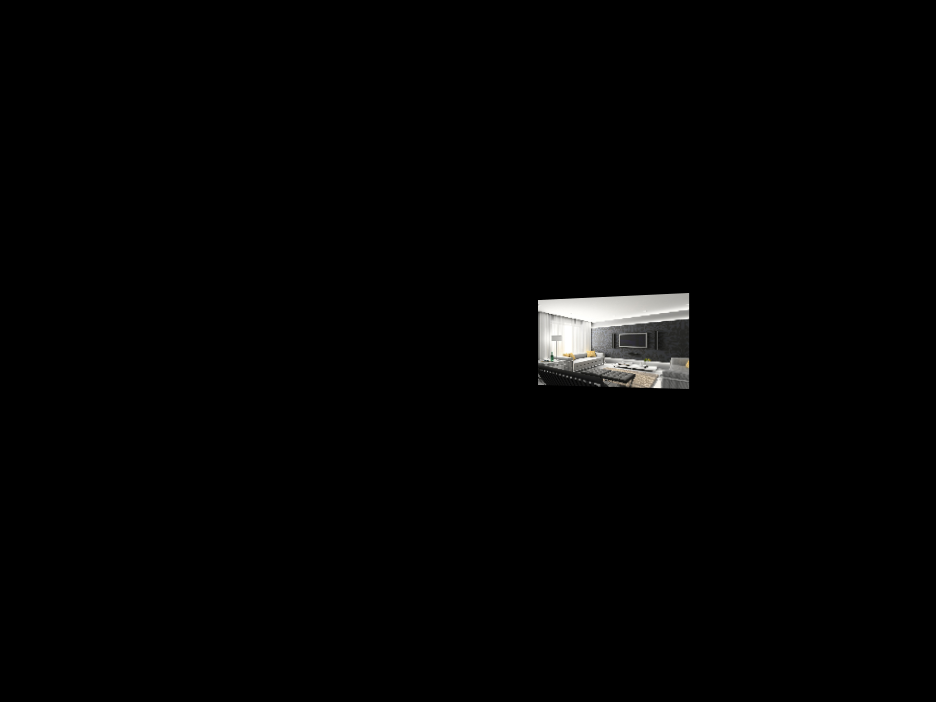

mask_inv


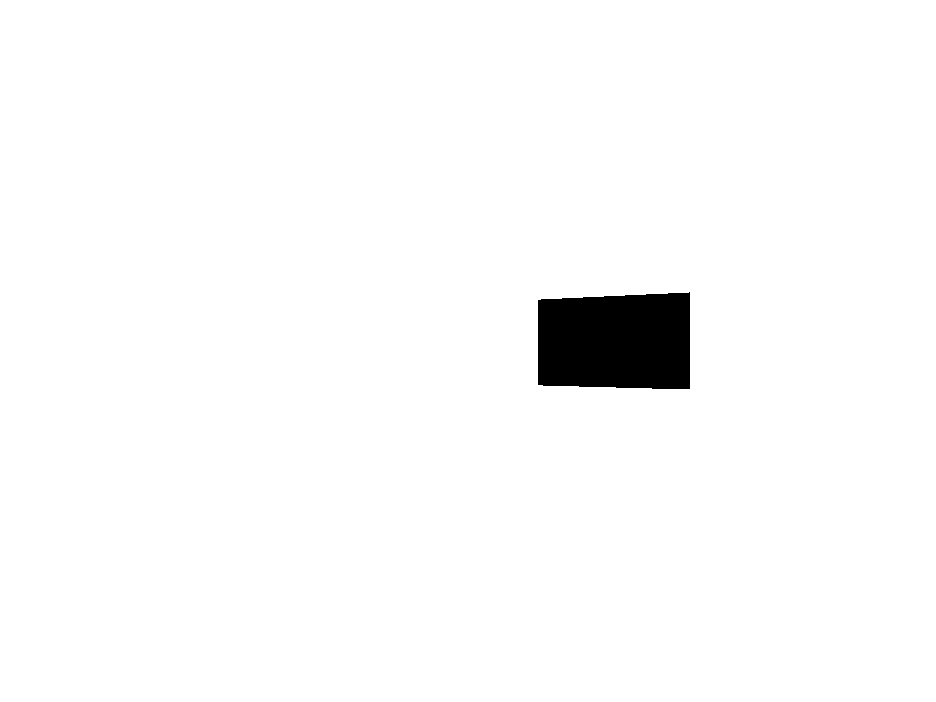

masked image


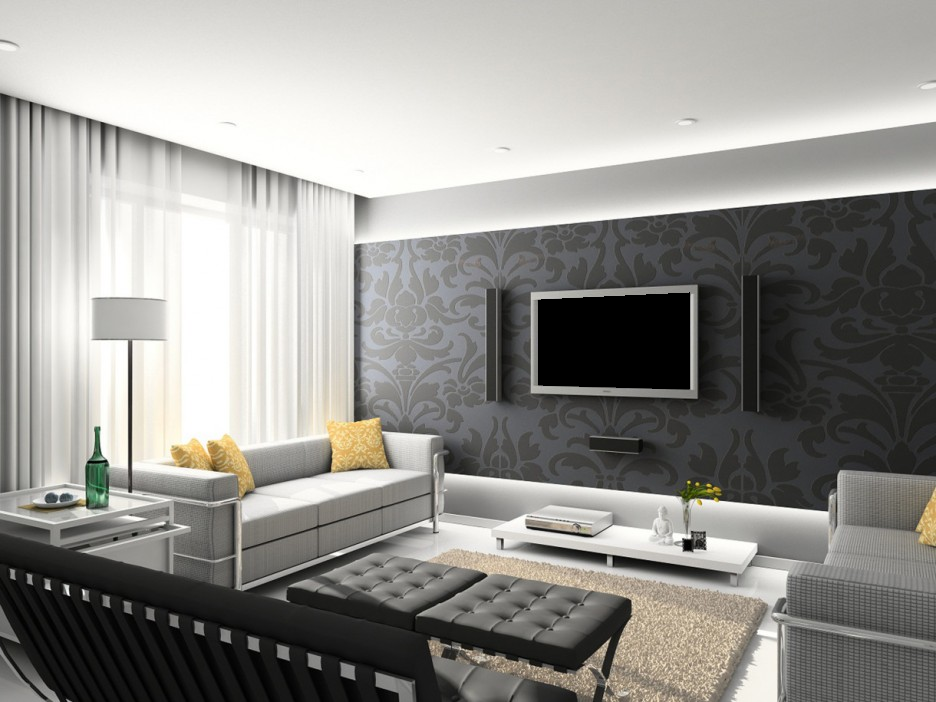

room.jpg image-in-image


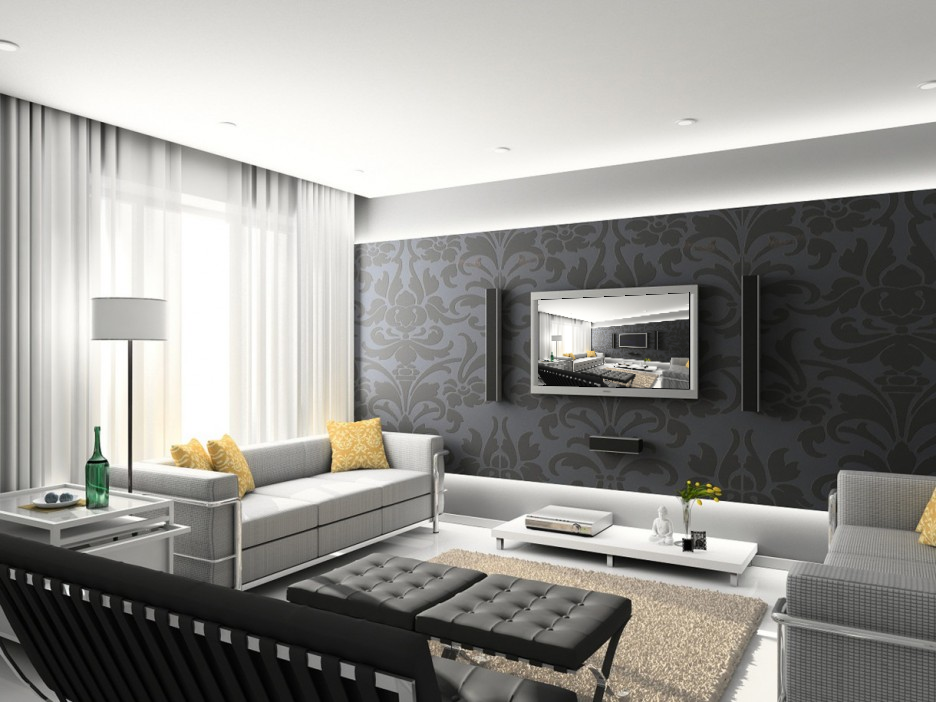

In [4]:
# img2 = cv2.imread(data_path+'images/room.jpg')

img2 = img1.copy()
rows,cols,ch = img1.shape

# Hard coded the 4 corner points on the reference image to be fitted.
rect = np.float32([[538, 300], [688, 293],
                   [538, 384], [688, 388]])

# rect = np.float32([[550, 503], [612, 512],
#                    [528, 517], [592, 525]])

# rect = np.float32([[787, 575], [930, 595],
#                    [790, 613], [931, 638]])

# now that we have our rectangle of points, let's compute
# the width of our new image
(tl, tr, bl, br) = rect

widthA = (tr[0] - tl[0])
widthB = (br[0] - bl[0])
# ...and now for the height of our new image
heightA = (bl[1] - tl[1])
heightB = (br[1] - tr[1])
# take the maximum of the width and height values to reach
# our final dimensions
maxWidth = max(int(widthA), int(widthB))
maxHeight = max(int(heightA), int(heightB))

img2 = cv2.resize(img2, (maxWidth,maxHeight))

# construct our destination points which will be used to
# map the screen to a top-down, "birds eye" view
src = np.array([[0, 0],[maxWidth-1, 0],
                [0, maxHeight-1],[maxWidth-1, maxHeight-1]], dtype = "float32")
# calculate the perspective transform matrix and warp
# the perspective to grab the screen
# M = cv2.getPerspectiveTransform(src, rect)

MH = computeHomography(src,rect)
dst = cv2.warpPerspective(img2, MH, (cols,rows))

print('warpPerspective')
cv2_imshow(cv2.warpPerspective(img2, MH, (cols,rows)))


img2gray = cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY)
_,mask = cv2.threshold(img2gray, 0, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

print('mask_inv')
cv2_imshow(mask_inv)

img1_new = cv2.bitwise_and(img1,img1,mask=mask_inv)

print('masked image')
cv2_imshow(img1_new)
# Just for Debugging the output.
final = cv2.add(dst, img1_new)

print('room.jpg image-in-image')
cv2_imshow(final)

In [5]:
cv2.imwrite('final.jpg',final)

# from google.colab import files
# files.download('final.jpg')

True